In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import zipfile

In [ ]:
!pip install misc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement misc (from versions: none)
ERROR: No matching distribution found for misc


In [ ]:
# load the libraries

import sys
sys.path.append('../')

import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import scipy.io as sio
import cv2
import json
#import openslide

#from misc.wsi_handler import get_file_handler
#from misc.viz_utils import visualize_instances_dict

In [ ]:
files_path ='/content/drive/MyDrive/CV/final project'
os.chdir('/content/drive/MyDrive/CV/final project')

In [ ]:
#Unzipping the dataset
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CV/final project/CoNSeP.zip", "r")
zip_ref.extractall('/content/drive/MyDrive/CV/final project')
print('Extracted')
zip_ref.close()

In [ ]:
# first, we shall set the image tile, WSI and output paths.

tile_path = '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/'
tile_mat_path = '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Labels/'
tile_overlay_path = '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Overlay/'

In [ ]:
# load the original image, the `.mat` file and the overlay

image_list = glob.glob(tile_path + '*.png')
ext = ['png']
#image_list = (glob.glob(title_path + '*.' + e) for e in ext)
image_list.sort()

# get a random image 
rand_nr = np.random.randint(0,len(image_list))
image_file = image_list[rand_nr]

basename = os.path.basename(image_file)
image_ext = basename.split('.')[-1]
basename = basename[:-(len(image_ext)+1)]

image = cv2.imread(image_file)
# convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# get the corresponding `.mat` file 
result_mat = sio.loadmat(tile_mat_path + basename + '.mat')

# get the overlay
overlay = cv2.imread(tile_overlay_path + basename + '.png')
overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

In [ ]:
print(image_list)

['/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_1.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_10.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_11.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_12.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_13.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_14.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_15.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_16.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_17.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_18.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_19.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_2.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_20.png', '/content/dri

In [ ]:
print(result_mat)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 15 00:19:23 2020', '__version__': '1.0', '__globals__': [], 'inst_map': array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 260., 260., 260.],
       [  0.,   0.,   0., ..., 260., 260., 260.],
       [  0.,   0.,   0., ..., 260., 260., 260.]]), 'type_map': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.],
       [0., 0., 0., ..., 4., 4., 4.]]), 'inst_type': array([[4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.],


In [ ]:
# ** now, let's get the outputs and print some basic shape information
# 2D map where each nucleus has a unique ID assigned. 0 is background
inst_map = result_mat['inst_map'] 
# Nx2 length array denoting nuclear type predictions. N is the number of nuclei
# idx=0 denotes the corresponding inst_id in the `inst_map` and 
# idx=1 denotes the type of that inst_id
inst_type = result_mat['inst_type'] 
print(inst_type)

[[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.

In [ ]:
print(inst_map)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 260. 260. 260.]
 [  0.   0.   0. ... 260. 260. 260.]
 [  0.   0.   0. ... 260. 260. 260.]]


In [ ]:
print('instance map shape', inst_map.shape)

instance map shape (1000, 1000)


In [ ]:
# double check the number of instances is the same as the number of type predictions
print('number of instances', len(np.unique(inst_map)[1:].tolist()))

number of instances 891


In [ ]:
print('number of type predictions', len(np.unique(inst_type)))

number of type predictions 4


In [ ]:
print('overlay shape', overlay.shape)

overlay shape (1000, 1000, 3)


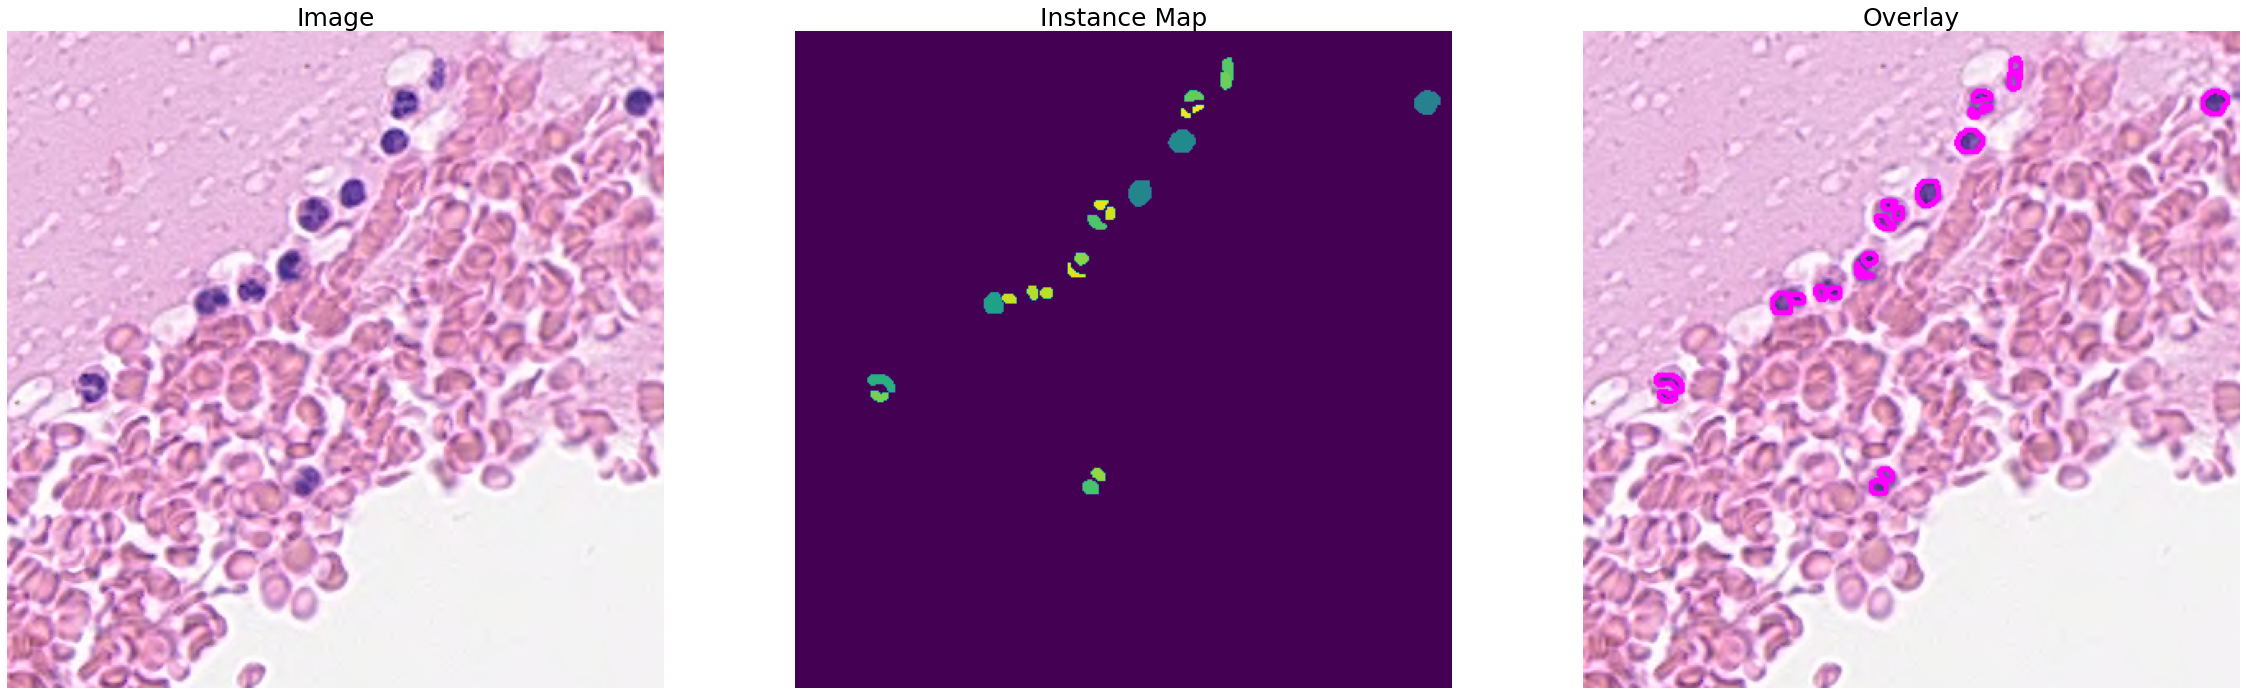

In [ ]:
# plot the original image, along with the instance map and the overlay

plt.figure(figsize=(40,20))

plt.subplot(1,3,1)
plt.imshow(image[:400,:400,:])
plt.axis('off')
plt.title('Image', fontsize=25)

plt.subplot(1,3,2)
plt.imshow(inst_map[:400,:400])
plt.axis('off')
plt.title('Instance Map', fontsize=25)

plt.subplot(1,3,3)
plt.imshow(overlay[:400,:400,:])
plt.axis('off')
plt
plt.title('Overlay', fontsize=25)

plt.show()

In [ ]:
# let's inspect the inst_type output

print(np.unique(inst_type))

[2. 5. 6.]


We observe that the values range from 0 (background) to N where N is the number of classes.

Refrence: https://github.com/vqdang/hover_net/blob/master/examples/usage.ipynb


Second Trial

In [ ]:
files_path_og = "/content/drive/MyDrive/CV/final project/CoNSeP/"

In [ ]:
train_image_dir=os.path.join(files_path+'/Train/')
train_label_dir=os.path.join(files_path+'/annotations_prepped_train')
train_overlay_dir=os.path.join(files_path+'/annotations_prepped_train')
test_image_dir=os.path.join(files_path+'/images_prepped_test')
test_label_dir=os.path.join(files_path+'/annotations_prepped_test')
test_overlay_dir=os.path.join(files_path+'/annotations_prepped_train')